In [754]:
import numpy as np 
from sklearn.datasets import fetch_openml

In [756]:
x,y=fetch_openml('mnist_784',version=1,return_X_y=True,as_frame=False)     # Original version , returns x ,y , not as dataframe but a numpy array

In [757]:
X=x/255.0                                                                  #I will get values bw 0 and 1 as image pixel intensities are from 0-255
y=y.astype(int)                                                            # no need of float values in true labels

In [758]:
def one_hot_encoding(y,classes=10):           
    return np.eye(classes)[y]

In [759]:
Y=one_hot_encoding(y)                                                      #one hot encoding the labels 

In [760]:
X_train,X_test,X_cv=X[:50000],X[60000:],X[50000:60000]                     # We have 70k images dividing them in test train cv splits
Y_train,Y_test,Y_cv=Y[:50000],Y[60000:],Y[50000:60000]

In [761]:
print(X_train.shape,X_test.shape,X_cv.shape,Y_train.shape,Y_test.shape,Y_cv.shape)     

(50000, 784) (10000, 784) (10000, 784) (50000, 10) (10000, 10) (10000, 10)


In [762]:
w1=np.random.randn(784,256)* np.sqrt(2/784)                                 # Keeping neural net deep for efficiency , initializing random weights
b1=np.zeros((1,256))
w2=np.random.randn(256,128)*np.sqrt(2/256)
b2=np.zeros((1,128))
w3=np.random.randn(128,64)*np.sqrt(2/128)
b3=np.zeros((1,64))
w4=np.random.randn(64,10)*np.sqrt(2/64)
b4=np.zeros((1,10))


In [763]:
def forward_propagation(X,w1,b1,w2,b2,w3,b3,w4,b4):                        # froward propagation 
    Z1=X @ w1 + b1
    A1=relu(Z1)
    Z2=A1 @ w2 + b2
    A2=relu(Z2)
    Z3=A2 @ w3 + b3
    A3=relu(Z3)
    Z4=A3 @ w4 + b4
    A4=softmax(Z4)
    return Z1,Z2,Z3,Z4,A1,A2,A3,A4                                          # will store in cache then I'll use them for backprop 


In [764]:
def relu(Z):                                   
    return np.maximum(0,Z)
def relu_derivative(Z):
    return (Z>0).astype(float)
def softmax(Z):
    exp_z=np.exp(Z-np.max(Z,axis=1,keepdims=True))                         # Normalizing by substracting Z values else exponent will be large nd gradient descent will be slower
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)
    

In [765]:
def cost_function(ytrue,ypred):
    m = ytrue.shape[0]                                                      #y=[50000,10]  extracting m=50000
    small_value = 1e-12                                                     # log 0 is undefined (make descent slow or might even diverge)
    ypred_new = np.clip(ypred,small_value,1.-small_value)
    loss= -np.sum(ytrue*np.log(ypred_new))
    cost= loss/m
    return cost

In [766]:
def back_propagation(X,Y,Z1,Z2,Z3,Z4,A1,A2,A3,A4,w1,b1,w2,b2,w3,b3,w4,b4):
    m=X.shape[0]
    dZ4= A4-Y
    dw4=(1/m)*np.dot(A3.T,dZ4)
    db4=(1/m)*np.sum(dZ4,axis=0,keepdims=True)
    dA3=np.dot(dZ4,w4.T)

    dZ3=dA3*relu_derivative(Z3)
    dw3=(1/m)*np.dot(A2.T,dZ3)
    db3=(1/m)*np.sum(dZ3,axis=0,keepdims=True)
    dA2=np.dot(dZ3,w3.T)

    dZ2=dA2*relu_derivative(Z2)                                               #chain rule
    dw2=(1/m)*np.dot(A1.T,dZ2)
    db2=(1/m)*np.sum(dZ2,axis=0,keepdims=True)
    dA1=np.dot(dZ2,w2.T)

    dZ1=dA1*relu_derivative(Z1)
    dw1=(1/m)*np.dot(X.T,dZ1)
    db1=(1/m)*np.sum(dZ1,axis=0,keepdims=True)

    return dw1,dw2,dw3,dw4,db1,db2,db3,db4

In [767]:
#training looooop :)

In [768]:
learning_rate_alpha=0.05
epochs=150
for epoch in range(epochs):
    Z1,Z2,Z3,Z4,A1,A2,A3,A4=forward_propagation(X_train,w1,b1,w2,b2,w3,b3,w4,b4)
    dw1,dw2,dw3,dw4,db1,db2,db3,db4=back_propagation(X_train,Y_train,Z1,Z2,Z3,Z4,A1,A2,A3,A4,w1,b1,w2,b2,w3,b3,w4,b4)
    cost=cost_function(Y_train,A4)
    w1-=learning_rate_alpha*dw1
    b1-=learning_rate_alpha*db1
    w2-=learning_rate_alpha*dw2
    b2-=learning_rate_alpha*db2
    w3-=learning_rate_alpha*dw3
    b3-=learning_rate_alpha*db3
    w4-=learning_rate_alpha*dw4
    b4-=learning_rate_alpha*db4
    print(f"Epoch {epoch+1}/{epochs} | Cost: {cost:.6f}")

Epoch 1/150 | Cost: 2.393016
Epoch 2/150 | Cost: 2.326879
Epoch 3/150 | Cost: 2.280431
Epoch 4/150 | Cost: 2.242515
Epoch 5/150 | Cost: 2.208875
Epoch 6/150 | Cost: 2.177541
Epoch 7/150 | Cost: 2.147525
Epoch 8/150 | Cost: 2.118264
Epoch 9/150 | Cost: 2.089381
Epoch 10/150 | Cost: 2.060589
Epoch 11/150 | Cost: 2.031595
Epoch 12/150 | Cost: 2.002252
Epoch 13/150 | Cost: 1.972336
Epoch 14/150 | Cost: 1.941738
Epoch 15/150 | Cost: 1.910426
Epoch 16/150 | Cost: 1.878313
Epoch 17/150 | Cost: 1.845394
Epoch 18/150 | Cost: 1.811683
Epoch 19/150 | Cost: 1.777247
Epoch 20/150 | Cost: 1.742135
Epoch 21/150 | Cost: 1.706396
Epoch 22/150 | Cost: 1.670127
Epoch 23/150 | Cost: 1.633461
Epoch 24/150 | Cost: 1.596495
Epoch 25/150 | Cost: 1.559406
Epoch 26/150 | Cost: 1.522312
Epoch 27/150 | Cost: 1.485354
Epoch 28/150 | Cost: 1.448664
Epoch 29/150 | Cost: 1.412355
Epoch 30/150 | Cost: 1.376543
Epoch 31/150 | Cost: 1.341378
Epoch 32/150 | Cost: 1.306948
Epoch 33/150 | Cost: 1.273350
Epoch 34/150 | Cost

In [769]:
print(dw1.shape,w1.shape)

(784, 256) (784, 256)


In [770]:
def predict(X,w1,b1,w2,b2,w3,b3,w4,b4):
    Z1,Z2,Z3,Z4,A1,A2,A3,A4=forward_propagation(X,w1,b1,w2,b2,w3,b3,w4,b4)
    return np.argmax(A4,axis=1)

In [771]:
def accuracy(ytrue,ypred):
    return np.mean(ytrue==ypred)

In [772]:
Y_train_label=np.argmax(Y_train,axis=1)
Y_cv_label=np.argmax(Y_cv,axis=1)
Y_test_label=np.argmax(Y_test,axis=1)

In [773]:
train_preds = predict(X_train, w1, b1, w2, b2, w3, b3, w4, b4)
cv_preds = predict(X_cv, w1, b1, w2, b2, w3, b3, w4, b4)
test_preds = predict(X_test, w1, b1, w2, b2, w3, b3, w4, b4)

print("Train Accuracy:", accuracy(Y_train_label, train_preds))
print("CV Accuracy:", accuracy(Y_cv_label, cv_preds))
print("Test Accuracy:", accuracy(Y_test_label, test_preds))


Train Accuracy: 0.89272
CV Accuracy: 0.9034
Test Accuracy: 0.9001


In [774]:
print(X_cv.shape, cv_preds.shape)


(10000, 784) (10000,)


In [804]:
# Got 10% accuracy on the projects prior debugging below is the debugging mechaanish I used
# first looked at the cost function being stuck at 2.__ something then I finally changed my learning rates and tweaked random intialization parameters
# Which came out to be a problem in my model and then I kept tweaking the parameters and reached 90% accuracy in this deeo neaural net build from scratch

In [ ]:
# Used minibatches too

In [777]:
mini_X = X_train[:100]
mini_Y = Y_train[:100]
for epoch in range(50):
    Z1, Z2, Z3, Z4, A1, A2, A3, A4 = forward_propagation(mini_X, w1, b1, w2, b2, w3, b3, w4, b4)
    dw1, dw2, dw3, dw4, db1, db2, db3, db4 = back_propagation(mini_X, mini_Y, Z1, Z2, Z3, Z4, A1, A2, A3, A4, w1, b1, w2, b2, w3, b3, w4, b4)
    cost = cost_function(mini_Y, A4)
    w1 -= learning_rate_alpha * dw1
    b1 -= learning_rate_alpha * db1
    w2 -= learning_rate_alpha * dw2
    b2 -= learning_rate_alpha * db2
    w3 -= learning_rate_alpha * dw3
    b3 -= learning_rate_alpha * db3
    w4 -= learning_rate_alpha * dw4
    b4 -= learning_rate_alpha * db4
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: cost = {cost}")        
mini_preds = predict(mini_X, w1, b1, w2, b2, w3, b3, w4, b4)
mini_labels = np.argmax(mini_Y, axis=1)
print("Small batch accuracy:", accuracy(mini_labels, mini_preds))

Epoch 10: cost = 0.15392873012388533
Epoch 20: cost = 0.09040604338854824
Epoch 30: cost = 0.06258339408076101
Epoch 40: cost = 0.04742063260483258
Epoch 50: cost = 0.03788817378737865
Small batch accuracy: 1.0


In [779]:
Z1, Z2, Z3, Z4, A1, A2, A3, A4 = forward_propagation(X_train[:5], w1, b1, w2, b2, w3, b3, w4, b4)
print("Softmax A4 sample rows:\n", A4)
print("Row sums (should be 1):", np.sum(A4, axis=1))

Softmax A4 sample rows:
 [[2.96586272e-02 1.92085720e-03 6.86070640e-04 6.87549866e-02
  2.74888855e-04 8.74652830e-01 1.42820870e-03 1.10756873e-03
  1.50671757e-02 6.44878674e-03]
 [9.99320477e-01 8.64002757e-09 1.04292000e-05 2.12970485e-05
  1.78605547e-06 5.82493810e-04 5.34117074e-06 1.92625348e-05
  9.86194036e-06 2.90421656e-05]
 [3.58385376e-04 6.28990044e-05 6.12473922e-04 8.88455009e-04
  9.68379072e-01 5.47127376e-04 1.90869534e-03 1.53727590e-03
  7.32094326e-04 2.49735215e-02]
 [8.94247780e-06 9.83553473e-01 8.63300197e-04 1.00688740e-03
  1.56714572e-04 1.23914163e-03 4.52531299e-04 1.24150815e-04
  1.13831200e-02 1.21173841e-03]
 [4.69285451e-06 2.77394417e-05 2.81828801e-05 1.69067057e-05
  5.48106783e-02 3.60657253e-05 4.61562213e-06 1.08641024e-02
  4.54459928e-04 9.33752556e-01]]
Row sums (should be 1): [1. 1. 1. 1. 1.]


In [791]:
X_dbg = X_train[:4]
Y_dbg = Y_train[:4]
Z1, Z2, Z3, Z4, A1, A2, A3, A4 = forward_propagation(X_dbg, w1, b1, w2, b2, w3, b3, w4, b4)
dw1, dw2, dw3, dw4, db1, db2, db3, db4 = back_propagation(X_dbg, Y_dbg, Z1, Z2, Z3, Z4, A1, A2, A3, A4, w1, b1, w2, b2, w3, b3, w4, b4)
print("dw1 mean/std/min/max : ", np.mean(dw1), np.std(dw1), np.min(dw1), np.max(dw1))
print("dw2 mean/std/min/max : ", np.mean(dw2), np.std(dw2), np.min(dw2), np.max(dw2))
print("dw3 mean/std/min/max : ", np.mean(dw3), np.std(dw3), np.min(dw3), np.max(dw3))
print("dw4 mean/std/min/max : ", np.mean(dw4), np.std(dw4), np.min(dw4), np.max(dw4))

dw1 mean/std/min/max :  -4.7782391411507776e-05 0.001843626474197183 -0.018842272015883985 0.01962688030435938
dw2 mean/std/min/max :  9.32895901918468e-06 0.003941163346121476 -0.04153144347684647 0.04191941658277587
dw3 mean/std/min/max :  0.00012142878327400087 0.007376070934735101 -0.06428436075933437 0.05554932488311138
dw4 mean/std/min/max :  5.893994060174323e-18 0.02267276793404715 -0.152484346829236 0.08566791045512626


In [824]:
import matplotlib.pyplot as plt

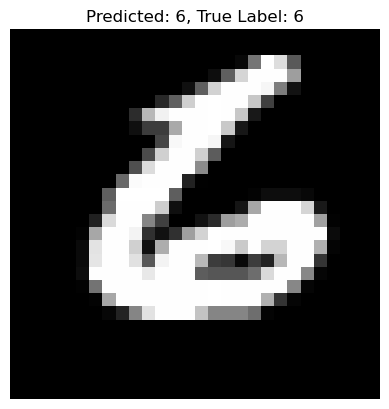

In [838]:
def visualization(X, preds, trueValue, index=0):
    plt.imshow(X[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {preds[index]}, True Label: {trueValue[index]}")
    plt.axis('off')
    plt.show()
visualization(X_test, test_preds, Y_test_label, index=9999) 